###   **多元统计分析及R语言建模（第五版）**
###   本文档是基于Jupyter Notebook编写的
###   建议安装anaconda（https://www.anaconda.com/） 
###   修改时间：王斌会 2020.2.1

# 1 多元统计分析概述 

In [1]:
#【输出设置】
#setwd("D:/mvstats5")              #设置目录

[1] -1.0108  0.1658  0.6476  0.0866  0.6339 -0.1620 -1.0892 -0.1065 -0.9992
[10]  1.4188 -0.5161 -0.1373  0.6447 -1.4822  1.1156  0.1614  0.0437 -1.4887
[19] -1.7586 -0.0631  0.4131  1.0421 -0.0962 -0.3913 -0.5079 -0.4473 -0.0119
[28] -0.3448 -0.0968 -0.6604 -0.6020 -1.5168 -2.0169  1.1188 -0.1694 -1.3012
[37] -0.2729  0.9733 -0.5700 -0.4201 -0.3741 -0.8668 -0.1272 -0.1351 -1.1251
[46] -1.4494 -0.8889  0.9418  1.3780 -1.2038

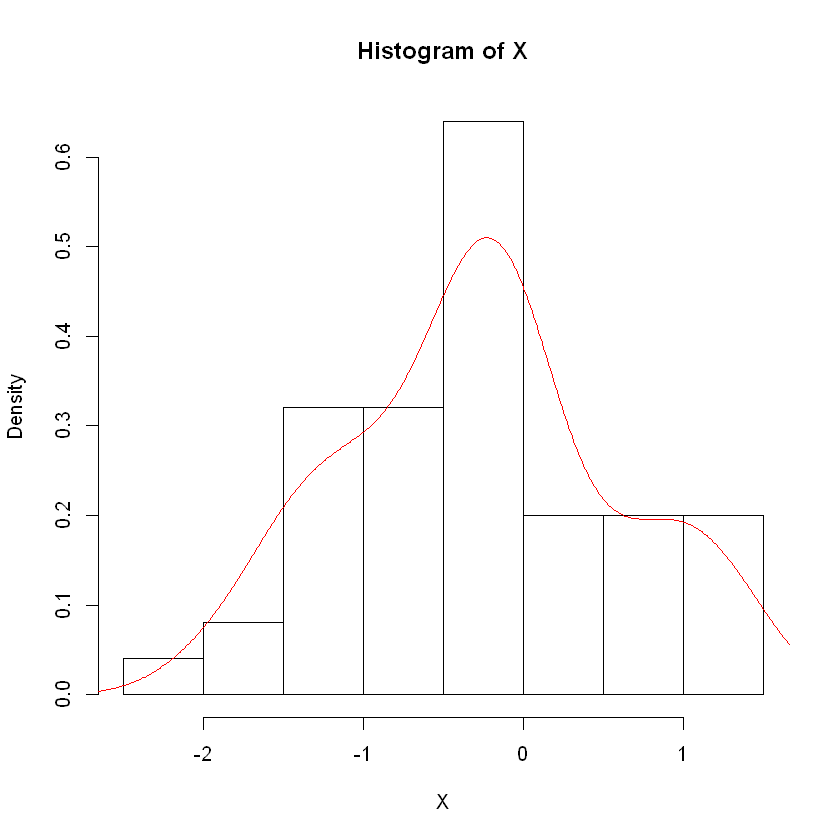

In [2]:
X=rnorm(50); round(X,4)            #产生50个标准正态随机数
hist(X,prob=TRUE)                  #做数据的直方图
lines(density(X),col='red')        #添加密度函数曲线 

# 2 多元数据的数学表达 

## 2.3  数据矩阵及R表示

In [3]:
#### 创建一个向量
x1=c(171,175,159,155,152,158,154,164,168,166,159,164)
x2=c(57,64,41,38,35,44,41,51,57,49,47,46)
length(x1)  #向量的长度
a=1:9; a
b=c(1,3,6:4,9); b

[1] 12

[1] 1 2 3 4 5 6 7 8 9

[1] 1 3 6 5 4 9

In [4]:
A=matrix(c(1,4,2,5,3,6),nrow=2,ncol=3); A   
#A=matrix(c(1,4,2,5,3,6),2,3); A   
B=matrix(c(1,2,3,4,5,6),3,2); B   
t(A) #求矩阵转置

A[,1:2]+B[1:2,] #矩阵加法
A[,2:3]+B[2:3,] #矩阵减法
C=A%*%B;C       #矩阵乘法  
D=B%*%A;D        

1,2,3
4,5,6


1,4
2,5
3,6


1,4
2,5
3,6


2,6
6,10


4,8
8,12


14,32
32,77


17,22,27
22,29,36
27,36,45


## 2.4  数据框及R表示

In [5]:
X=data.frame(x1,x2); X              #产生由X1和X2构建的数据框
Y=data.frame('身高'=x1,'体重'=x2);Y  #赋予数据框新的列标签

x1,x2
<dbl>,<dbl>
171,57
175,64
159,41
155,38
152,35
158,44
154,41
164,51
168,57


身高,体重
<dbl>,<dbl>
171,57
175,64
159,41
155,38
152,35
158,44
154,41
164,51
168,57


## 2.5  多元数据的R调用 

### 方法一、复制拷贝（最方便）

In [7]:
#在Excel文件mvstats5.xlsx的表单d2.1中选择A1:G6，并复制到剪切板
dat=read.table("clipboard",header=T);dat  #将剪切板数据读入数据框dat中

年龄,性别,风险意识,专兼职情况,职业状况,教育程度,投资结果
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
20-29,男,有,兼职,金融,高中,赚钱
50-59,女,有,兼职,科教,中学,持平
40-49,女,无,专职,科教,中学,赔钱
30-39,男,有,兼职,工人,中专,赚钱
50-59,女,有,专职,农民,大专,赚钱


### 方法二、csv逗号文本格式（最通用）

In [8]:
dat=read.csv('d2.1.csv')  #d2.1.csv数据读入数据框dat中
head(dat)

,年龄,性别,风险意识,专兼职情况,职业状况,教育程度,投资结果
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,20-29,男,有,兼职,金融,高中,赚钱
2,50-59,女,有,兼职,科教,中学,持平
3,40-49,女,无,专职,科教,中学,赔钱
4,30-39,男,有,兼职,工人,中专,赚钱
5,50-59,女,有,专职,农民,大专,赚钱
6,40-49,女,有,兼职,管理,小学,赚钱


### 方法三、excel格式数据（最全面）

In [9]:
#library(readxl)   #加载包readxl, 需先安装包, install.packages('readxl') 
#d2.1=read_excel('mvstats5.xlsx',sheet='d2.1') #读取mvstats5.xlsx表格d2.2数据
library(openxlsx)  # 加载包openxlsx，需先安装：install.packages('openxlsx') 
d2.1=read.xlsx('mvstats5.xlsx','d2.1') #读取mvstats5.xlsx表格d2.1数据
head(d2.1)

Warning message:
"package 'openxlsx' was built under R version 3.6.2"


,年龄,性别,风险意识,专兼职情况,职业状况,教育程度,投资结果
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,20-29,男,有,兼职,金融,高中,赚钱
2,50-59,女,有,兼职,科教,中学,持平
3,40-49,女,无,专职,科教,中学,赔钱
4,30-39,男,有,兼职,工人,中专,赚钱
5,50-59,女,有,专职,农民,大专,赚钱
6,40-49,女,有,兼职,管理,小学,赚钱


## 2.6  多元数据简单R分析 

年龄
    *  0-19 20-29 30-39 40-49 50-59   60- 
   20     3    92   167   157    51    24 

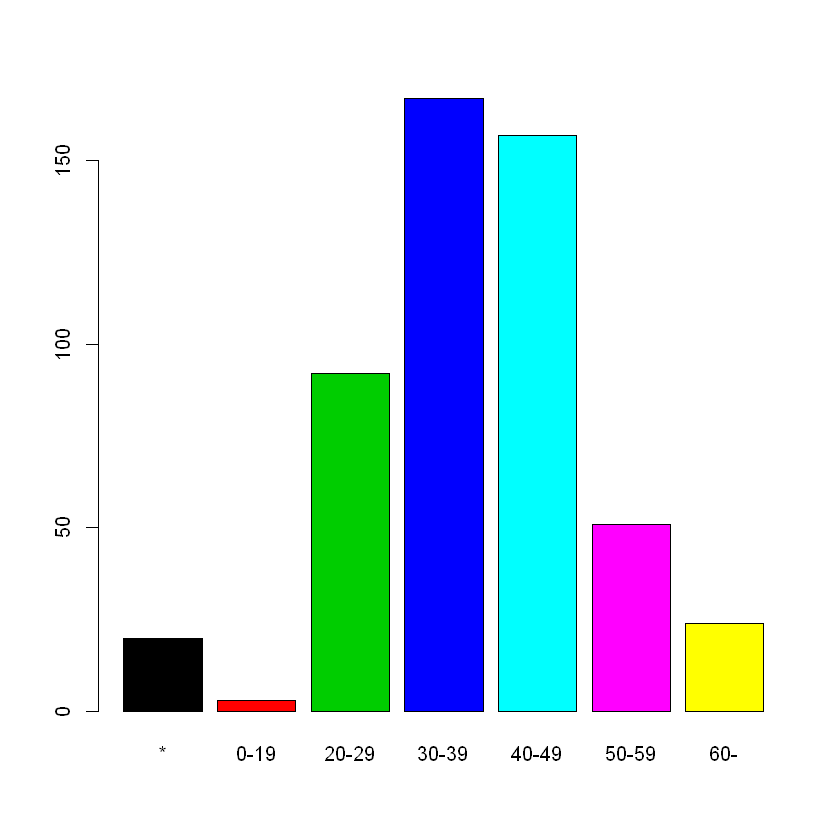

       性别
年龄     男  女
  *       9  11
  0-19    2   1
  20-29  69  23
  30-39 101  66
  40-49  89  68
  50-59  24  27
  60-    15   9

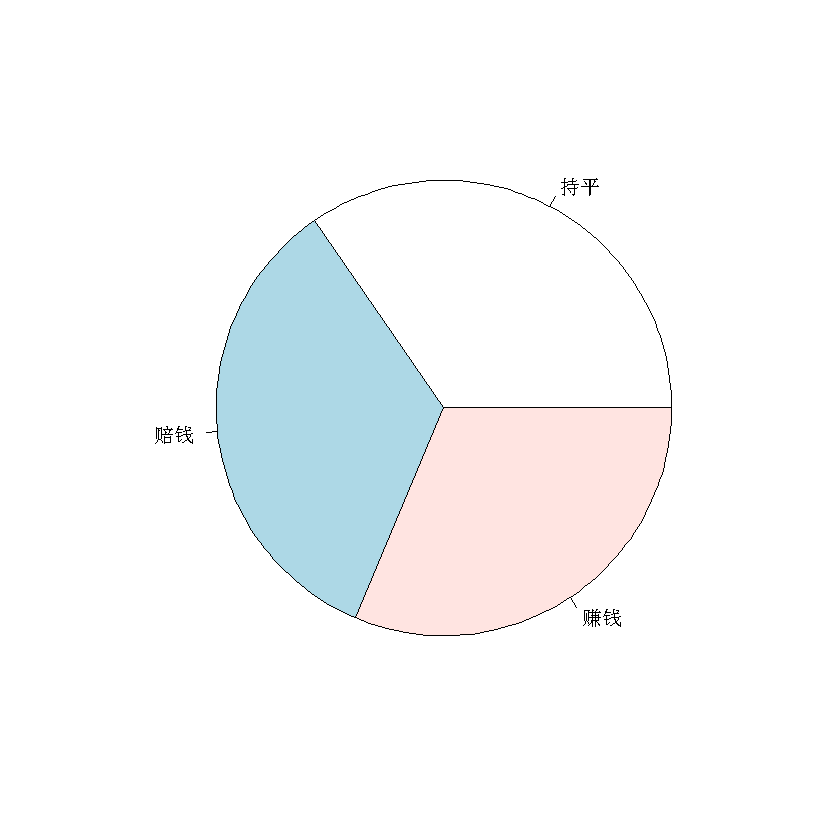

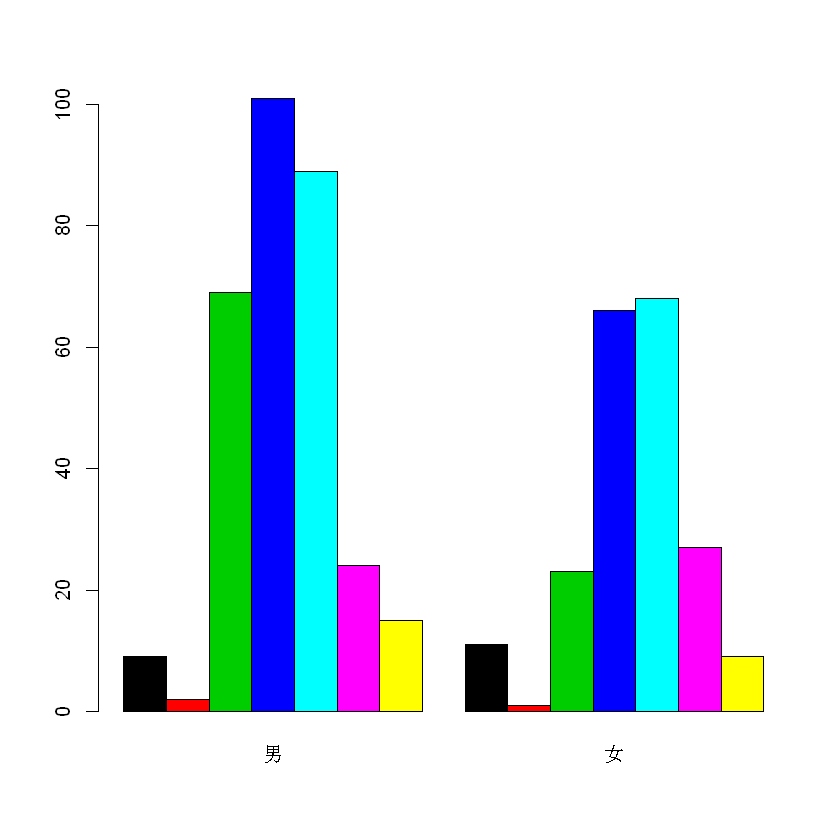

           投资结果 持平 赔钱 赚钱
年龄  性别                        
*     男               4    3    2
      女               3    7    1
0-19  男               0    0    2
      女               1    0    0
20-29 男              21   17   31
      女              10    7    6
30-39 男              31   30   40
      女              30   20   16
40-49 男              31   30   28
      女              25   30   13
50-59 男               5   11    8
      女               8   10    9
60-   男               7    5    3
      女               2    5    2

           投资结果 持平 赔钱 赚钱
性别 年龄                         
男   *                 4    3    2
     0-19              0    0    2
     20-29            21   17   31
     30-39            31   30   40
     40-49            31   30   28
     50-59             5   11    8
     60-               7    5    3
女   *                 3    7    1
     0-19              1    0    0
     20-29            10    7    6
     30-39            30   20   16
     40-49            25   30   13
     50-59             8   10    9
     60-               2    5    2

              年龄  * 0-19 20-29 30-39 40-49 50-59 60-
性别 投资结果                                         
男   持平           4    0    21    31    31     5   7
     赔钱           3    0    17    30    30    11   5
     赚钱           2    2    31    40    28     8   3
女   持平           3    1    10    30    25     8   2
     赔钱           7    0     7    20    30    10   5
     赚钱           1    0     6    16    13     9   2

[1]  99  96 114  79  79  47

[1]  20   3  92 167 157  51  24

[1] 514

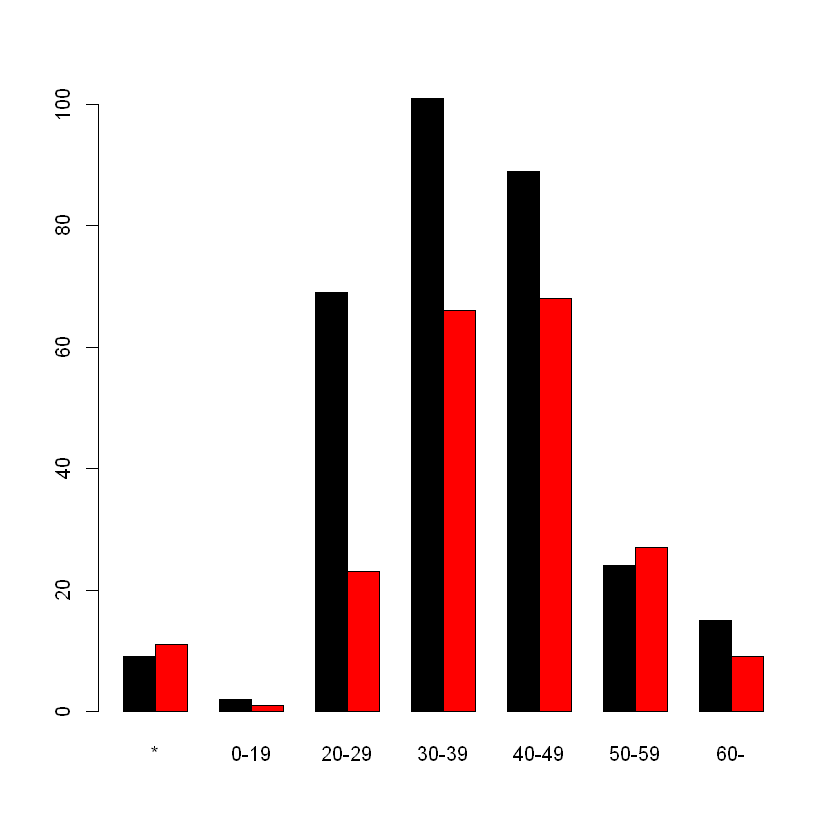

In [10]:
attach(d2.1)   #绑定数据
  table(年龄)  #一维列联表
  barplot(table(年龄),col=1:7)#条形图
  pie(table(投资结果))#饼图
  table(年龄,性别) #二维列联表
  barplot(table(年龄,性别),beside=T,col=1:7)#以性别分组的年龄条图
  barplot(table(性别,年龄),beside=T,col=1:2)#以年龄分组的性别条图
  ftable(年龄,性别,投资结果) #以年龄、性别排列的结果频数三维列联表
  ftable(性别,年龄,投资结果)#以性别、年龄排列的结果频数三维列联表
  (ft=ftable(性别,投资结果,年龄))#显示以性别、结果排列的年龄频数三维列联表
  rowSums(ft)#求行和
  colSums(ft)#求列和
  sum(ft)#求总和
detach(d2.1) #解除数据绑定